## Project Description:

Welcome to your new project! You will have the opportunity to apply the knowledge and skills you've learned in class.

The tasks are divided into two parts, the first part is to create an image classification project that predicts a person's age based on their photograph. You will be utilizing the power of machine learning pipelines to streamline your workflow and effectively manage the different stages of this project, from data preprocessing to model training and evaluation.

In the second part is transfer learning where you'll use a [Vision Transformer (ViT)](https://huggingface.co/google/vit-base-patch16-224-in21k) model pre-trained on ImageNet-21k and fine-tune it on the [FastJobs/Visual_Emotional_Analysis](https://huggingface.co/datasets/FastJobs/Visual_Emotional_Analysis) dataset for emotion recognition, with the final step being the publication of your trained model to the Hugging Face Model Hub.

Remember, the goal of this assignment is not just to build a model that makes accurate predictions, but also to understand the process of developing a machine-learning pipeline and the role each component plays in this process.

We encourage you to be creative, explore different strategies, and most importantly, have fun while learning. We can't wait to see the innovative solutions you come up with! Best of luck!

## Task 1 Image Classification using Pipeline

### Step 1: Image Classification using Hugging Face's Model

In this first task, your task is to develop an image classification pipeline that takes **an image URL as input**, displays the image, and uses the Hugging Face's model to predict the age of the person in the image. You can get the model [here](https://huggingface.co/nateraw/vit-age-classifier).

Here are the key steps that you might be able to follow:

1. **Image URL Input:** Your program should accept an image URL as input. Make sure to handle potential issues with invalid URLs or inaccessible images.
2. **Image Display:** Display the image from the URL in your notebook. This will provide a visual confirmation that the correct image is being processed.
3. **Model Loading and Prediction:** Load the 'nateraw/vit-age-classifier' model from Hugging Face's model hub and pass the image URL to the model to obtain the prediction. The model should predict the age of the person in the image.
4. **Output Display:** Display the output from the model in a clear and understandable manner.

#### Submission

- What percentage is the person in this picture (https://images.unsplash.com/photo-1596392927852-2a18c336fb78?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1280&q=80) is between age of "3-9"?

Submit in the numeric format up to 5 digits behind the decimal point. For example in below output:

```
{'0-2': '0.00152',
 '3-9': '0.00105',
 '10-19': '0.02567',
 '20-29': '3.32545',
 '30-39': '51.75200',
 '40-49': '40.24234',
 '50-59': '4.47803',
 '60-69': '0.17092',
 'more than 70': '0.00304'}
```

The answer would be `0.00105`.

In [ ]:
import requests
from transformers import pipeline
from io import BytesIO
from PIL import Image

# Load the image classification pipeline with fast image processing and GPU usage
classifier = pipeline("image-classification", model="nateraw/vit-age-classifier", use_fast=True, device=0)

# Define the image URL (make sure this URL points to an actual image)
image_url = "https://images.unsplash.com/photo-1596392927852-2a18c336fb78?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1280&q=80"

# Download the image and check content type
response = requests.get(image_url, stream=True)

if response.headers['Content-Type'].startswith('image/'):
    try:
        # Try opening the image with PIL
        image = Image.open(BytesIO(response.content))
        # If successful, you can proceed with the prediction
        prediction = classifier(image)
        print(prediction)
    except Exception as e:
        print(f"Error opening image: {e}")
else:
    print(f"Failed to fetch image. Content-Type is {response.headers['Content-Type']}")
for result in prediction:
    print(f"Label: {result['label']}, Score: {result['score']}")


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


[{'label': '3-9', 'score': 0.8102952241897583}, {'label': '0-2', 'score': 0.09772919118404388}, {'label': '10-19', 'score': 0.04794559255242348}, {'label': '20-29', 'score': 0.014716727659106255}, {'label': '30-39', 'score': 0.011733394116163254}]
Label: 3-9, Score: 0.8102952241897583
Label: 0-2, Score: 0.09772919118404388
Label: 10-19, Score: 0.04794559255242348
Label: 20-29, Score: 0.014716727659106255
Label: 30-39, Score: 0.011733394116163254


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


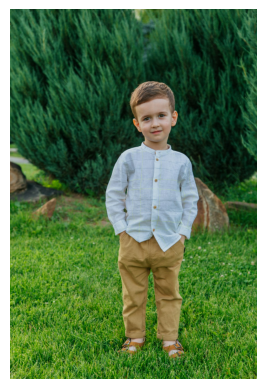

Predictions:
Label: 3-9, Score: 0.8102952241897583
Label: 0-2, Score: 0.09772919118404388
Label: 10-19, Score: 0.04794559255242348
Label: 20-29, Score: 0.014716727659106255
Label: 30-39, Score: 0.011733394116163254


In [ ]:
import requests
from transformers import pipeline
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

# Load the image classification pipeline with fast image processing and GPU usage
classifier = pipeline("image-classification", model="nateraw/vit-age-classifier", use_fast=True, device=0)

# Define the image URL
image_url = "https://images.unsplash.com/photo-1596392927852-2a18c336fb78?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1280&q=80"

# Download the image and check content type
response = requests.get(image_url, stream=True)

if response.headers['Content-Type'].startswith('image/'):
    try:
        # Try opening the image with PIL
        image = Image.open(BytesIO(response.content))

        # Display the image for visual confirmation
        plt.imshow(image)
        plt.axis('off')  # Hide axes
        plt.show()

        # If successful, you can proceed with the prediction
        prediction = classifier(image)

        # Print the prediction
        print("Predictions:")
        for result in prediction:
            print(f"Label: {result['label']}, Score: {result['score']}")

    except Exception as e:
        print(f"Error opening image: {e}")
else:
    print(f"Failed to fetch image. Content-Type is {response.headers['Content-Type']}")


In [ ]:
# Submit Method
assignment_id = "00_pipeline_and_gradio"
question_id = "01_image_classification_using_hugging_faces_model"
answer = "0.8102952241897583" # Put your answer here
submit(student_id, name, assignment_id, answer, question_id, drive_link)

'Assignment successfully submitted'

### Step 2: Image Classification using Hugging Face's Model and Gradio

In this second task, you will create a user-friendly interface using Gradio for your image classification pipeline that you created in Task 1. The difference with task 1 is, that in this task, you use **image files as input**, process them through the Hugging Face model, and display predictions output. The output displayed is **only the results with the highest `score`**.

Here are the key steps that you might be able to follow:

1. **Image Input:** Create a function to accept an image file as input. The image should be in a format that can be processed by the model.
2. **Model Loading and Prediction:** Load the model from Hugging Face's model hub and pass the image to the model to obtain the prediction. The model predicts the age of the person in the image.
3. **Gradio Interface:** Use Gradio to create a user-friendly interface for your application. The interface should allow users to upload an image file, and it should display the model's output in a clear and understandable manner.
4. **Interface Launch:** Launch the Gradio interface. Make sure that the interface is accessible and easy to use.

#### Submisssion

![Upload colab](https://storage.googleapis.com/rg-ai-bootcamp/project-3-pipeline-and-gradio/upload-colab.png)

You need to submit screenshot of your Gradio's app. In Google Colab you can just use the "Folder" sidebar and click the upload button. Make sure your screenshot match below requirements:

- You should upload a person's image to that app
- The score should be included at the screenshot


In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.4 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing 

In [ ]:
!pip install --upgrade pydantic fastapi
from pydantic import BaseModel




In [ ]:
!pip install pydantic==1.10.8


In [ ]:
from pydantic import BaseModel

class RequestModel(BaseModel):
    class Config:
        arbitrary_types_allowed = True


In [ ]:
from fastapi import FastAPI, Request

app = FastAPI()

@app.post("/upload")
async def handle_upload(request: Request):
    # Anda bisa mengakses data dari `request` langsung
    data = await request.json()
    return {"message": "Request received", "data": data}


In [ ]:
import requests
from PIL import Image
from io import BytesIO

from transformers import ViTImageProcessor, ViTForImageClassification

# Get example image from official fairface repo + read it in as an image
r = requests.get('https://raw.githubusercontent.com/DiwaPrasetyo02/Image-Fruit-Classification/main/1710662518320.jfif')
im = Image.open(BytesIO(r.content))

# Init model, transforms
model = ViTForImageClassification.from_pretrained('nateraw/vit-age-classifier')
transforms = ViTImageProcessor.from_pretrained('nateraw/vit-age-classifier')

# Transform our image and pass it through the model
inputs = transforms(im, return_tensors='pt')
output = model(**inputs)

# Predicted Class probabilities
proba = output.logits.softmax(1)

# Predicted Classes
preds = proba.argmax(1)

print(proba)

tensor([[1.9467e-05, 1.2801e-04, 4.7732e-03, 3.3116e-01, 5.8828e-01, 7.3060e-02,
         2.3950e-03, 1.4822e-04, 2.9234e-05]], grad_fn=<SoftmaxBackward0>)


In [ ]:
import torch
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import gradio as gr

# Load feature extractor and model from Hugging Face model hub
model_name = "nateraw/vit-age-classifier"
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)

def predict_age(image):
    # Prepare the image
    inputs = feature_extractor(images=image, return_tensors="pt")

    # Forward pass
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predicted class index
    logits = outputs.logits
    predicted_class_idx = logits.argmax(-1).item()

    # Get the probability score for the predicted class
    probs = torch.softmax(logits, dim=-1)
    predicted_prob = probs[0, predicted_class_idx].item()

    return f"Predicted Age: {predicted_class_idx} years, Confidence: {predicted_prob:.2f}"

# Define the Gradio interface
gr_interface = gr.Interface(
    fn=predict_age,  # The function that does prediction
    inputs=gr.Image(type="pil"),  # The input is an image
    outputs="text",  # The output is a text field showing the predicted age and confidence
    title="Age Prediction App",
    description="Upload an image of a person and get the predicted age."
)

# Launch the Gradio app with share=True
gr_interface.launch(share=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/197 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/850 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://93b4cb0a09ca0c3a46.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import shutil

# Hapus cache Gradio di Google Colab
shutil.rmtree('/root/.cache/gradio', ignore_errors=True)

print("Gradio cache cleared.")


Gradio cache cleared.


In [ ]:
import gradio as gr
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image

# Load the model and processor
processor = ViTFeatureExtractor.from_pretrained('nateraw/vit-age-classifier')
model = ViTForImageClassification.from_pretrained('nateraw/vit-age-classifier')

# Define a function for image prediction
def predict_age(image):
    # Process and classify the image
    inputs = processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    # Model predicts the label (age group)
    predicted_class_idx = logits.argmax(-1).item()
    predicted_age = model.config.id2label[predicted_class_idx]

    # Return the prediction along with the input image
    return image, f"Predicted Age Group: {predicted_age}"

# Create a Gradio interface
iface = gr.Interface(
    fn=predict_age,
    inputs=gr.Image(type="pil"),
    outputs=[gr.Image(type="pil"), gr.Textbox(label="Prediction")],
    title="Age Prediction using ViT",
    description="Upload an image and the model will predict the age group."
)

# Launch the interface
iface.launch()


/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://44a75338c6de8a4db6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

processor = ViTFeatureExtractor.from_pretrained('nateraw/vit-age-classifier')
model = ViTForImageClassification.from_pretrained('nateraw/vit-age-classifier')

image_path = "https://encrypted-tbn2.gstatic.com/licensed-image?q=tbn:ANd9GcSfcB96rkysCCHgQJd2l_RzFnat8AkW8MYEum8DTLCU5n9p-eSvRsRlrpk1K_6JgdofrpTZ__fJa_4Vkyo"
response = requests.get(image_path)
image = Image.open(BytesIO(response.content))

# Display the image
display(image)

try:
    # Process and classify the image
    inputs = processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    # Model predicts one of the 1000 ImageNet classes
    predicted_class_idx = logits.argmax(-1).item()
    print("Predicted class:", model.config.id2label[predicted_class_idx])
except Exception as e:
    print("An error occurred:", e)

Example of Expected Output:

![gradio-result](https://storage.googleapis.com/rg-ai-bootcamp/project-3-pipeline-and-gradio/gradio-result.png)

> Note: If your submission for Task-2 did not run (After you run it never changes from "*" to a number), stop the Code block that's running the Gradio app, then the submission will run. To stop the Code block, you can click on the Code block and then click the stop button.